 #  <p style="text-align: center;">CORGIE VEHICLE DATA PCA

**Problem Statement:**
The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

**Data Set:** The data contains features extracted from the silhouette of vehicles in different angles.

###  Load the libraries:

In [1]:
import numpy as np   
from sklearn.model_selection import train_test_split
import pandas as pd    
import matplotlib.pyplot as plt   
%matplotlib inline 
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

###  Import data files as data frames: 

In [2]:
Vehicle_Data = pd.read_csv("Vehicle.csv")

In [3]:
Vehicle_Data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done

### Data Quality Checks:

**Check for null values**

In [5]:
Vehicle_Data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

**Check the Dimension of data**

In [6]:
Vehicle_Data.shape

(846, 19)

In [7]:
Vehicle_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

There are 846 Observations of data input / rows and 19 data fields attributes / columns. All of the variables are Intergers.  

## HANDLING THE MISSING VALUES

**Strategies to address missing values data challenges:**

- Encode NAs as -1 or -9999. This works reasonably well for numerical features that are predominantly positive in value, and for tree-based models in general. 
- In case specific scenarios deletion of missing data is effective. Here you simply drop all cases/rows from the dataset that contain missing values. In the case of a very large dataset with very few missing values, this approach could potentially work really well. However, if the missing values are in cases that are also otherwise statistically distinct, this method may seriously skew the predictive model for which this data is used. Another major problem with this approach is that it will be unable to process any future data that contains missing values. If your predictive model is designed for production, this could create serious issues in deployment.
- Replace missing values with the mean/median value of the feature in which they occur.
- Label encode NAs as another level of a categorical variable. This works with tree-based models and other models if the feature can be numerically transformed (one-hot encoding, frequency encoding, etc.). 
- Run predictive models to impute the missing data. 

**Deciding on whether to elect to drop all missing data values from the respective data field:**
* Getting rid of rows with missing values is the easiest way of dealing with their presence
* But the downside is that we lose valid data from other columns which do not have missing values for that particular row

**Total number of missing values**

In [8]:
Vehicle_Data.isnull().sum().sum()

41

The above represents a substabtial portion of the data thus would rather elect to replace missing values with the median value

In [9]:
for col in Vehicle_Data.select_dtypes(include=np.number):
    Vehicle_Data[col] = Vehicle_Data[col].fillna(Vehicle_Data[col].median())

In [10]:
Vehicle_Data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

**Check the Dimension of data**

In [11]:
Vehicle_Data.shape

(846, 19)

In [12]:
Vehicle_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

## EXPLORATORY DATA ANALYTICS (EDA)

**Check the updated key features of the data**

In [13]:
Vehicle_Data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [14]:
pd.value_counts(Vehicle_Data['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

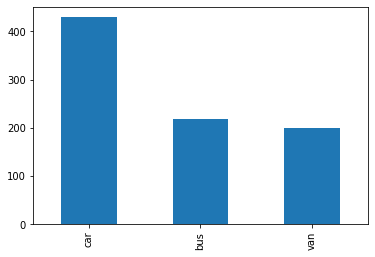

In [15]:
pd.value_counts(Vehicle_Data["class"]).plot(kind="bar")

### Univariate Analysis:
Display univariate plots of the data attributes from the respective Corgie Vehicle Data set.

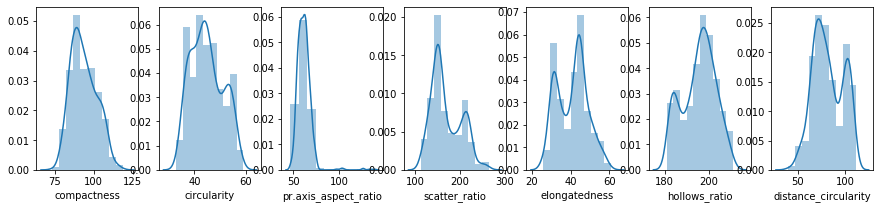

In [16]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 7, figsize=(15,3))
vis1 = sns.distplot(Vehicle_Data["compactness"],bins=10, ax= ax[0])
vis2 = sns.distplot(Vehicle_Data["circularity"],bins=10, ax=ax[1])
vis3 = sns.distplot(Vehicle_Data["pr.axis_aspect_ratio"],bins=10, ax=ax[2])
vis4 = sns.distplot(Vehicle_Data["scatter_ratio"],bins=10, ax=ax[3])
vis5 = sns.distplot(Vehicle_Data["elongatedness"],bins=10, ax=ax[4])
vis6 = sns.distplot(Vehicle_Data["hollows_ratio"],bins=10, ax=ax[5])
vis7 = sns.distplot(Vehicle_Data["distance_circularity"],bins=10, ax=ax[6])

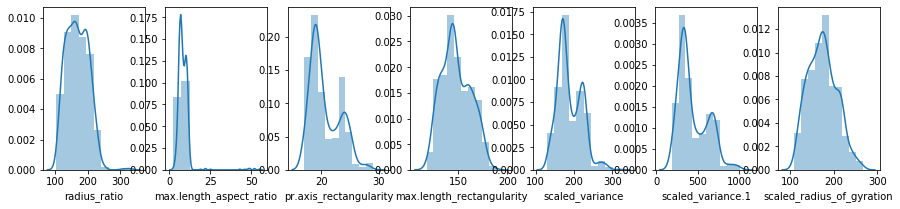

In [17]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 7, figsize=(15,3))
vis1 = sns.distplot(Vehicle_Data["radius_ratio"],bins=10, ax= ax[0])
vis2 = sns.distplot(Vehicle_Data["max.length_aspect_ratio"],bins=10, ax=ax[1])
vis3 = sns.distplot(Vehicle_Data["pr.axis_rectangularity"],bins=10, ax=ax[2])
vis4 = sns.distplot(Vehicle_Data["max.length_rectangularity"],bins=10, ax=ax[3])
vis5 = sns.distplot(Vehicle_Data["scaled_variance"],bins=10, ax=ax[4])
vis6 = sns.distplot(Vehicle_Data["scaled_variance.1"],bins=10, ax=ax[5])
vis7 = sns.distplot(Vehicle_Data["scaled_radius_of_gyration"],bins=10, ax=ax[6])

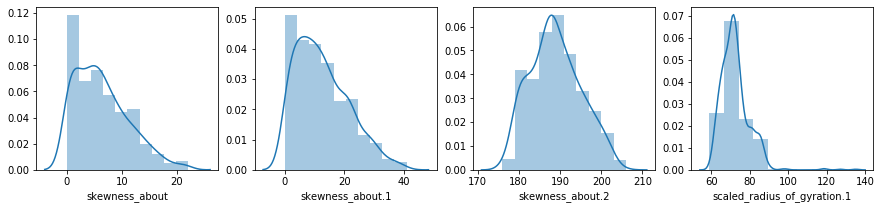

In [18]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 4, figsize=(15,3))
vis1 = sns.distplot(Vehicle_Data["skewness_about"],bins=10, ax= ax[0])
vis2 = sns.distplot(Vehicle_Data["skewness_about.1"],bins=10, ax=ax[1])
vis3 = sns.distplot(Vehicle_Data["skewness_about.2"],bins=10, ax=ax[2])
vis4 = sns.distplot(Vehicle_Data["scaled_radius_of_gyration.1"],bins=10, ax=ax[3])

**Analysis from univariate analysis:**

- Most of the data attributes seems to be normally distributed
- scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skwed.

### Univariate Analysis Using Boxplot:

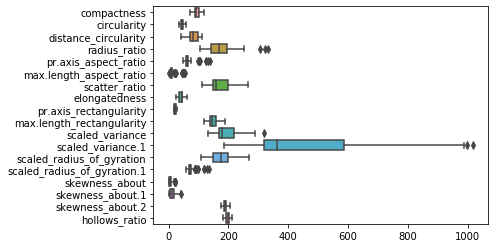

In [19]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers
ax = sns.boxplot(data=Vehicle_Data, orient="h")

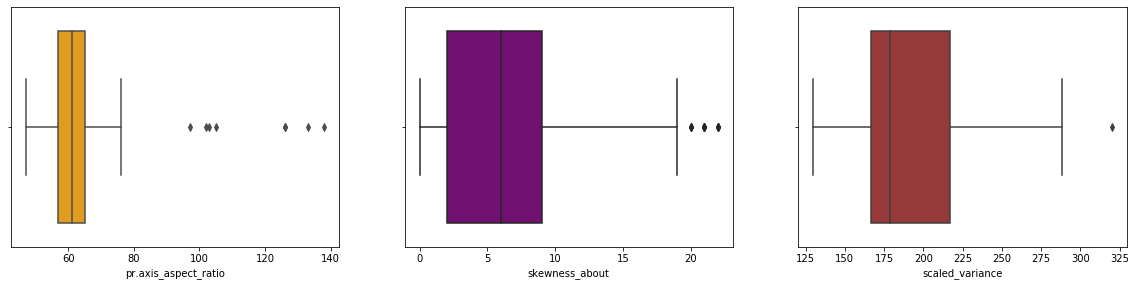

In [20]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= Vehicle_Data['pr.axis_aspect_ratio'], color='orange')

plt.subplot(3,3,2)
sns.boxplot(x= Vehicle_Data.skewness_about, color='purple')

plt.subplot(3,3,3)
sns.boxplot(x= Vehicle_Data.scaled_variance, color='brown')

plt.show()

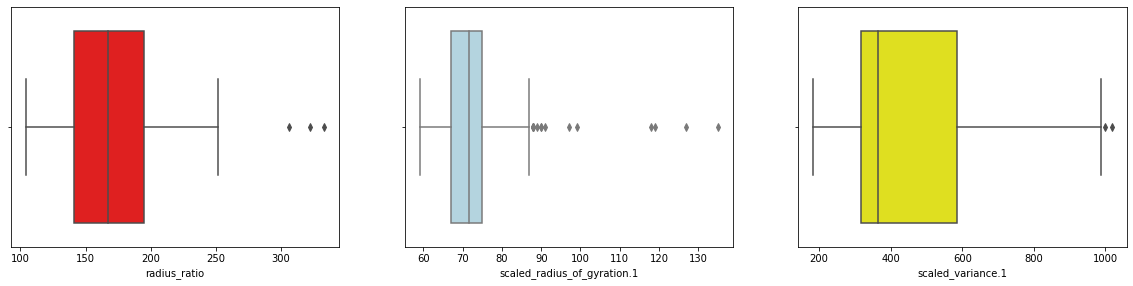

In [21]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= Vehicle_Data['radius_ratio'], color='red')

plt.subplot(3,3,2)
sns.boxplot(x= Vehicle_Data['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= Vehicle_Data['scaled_variance.1'], color='yellow')

plt.show()

**Observation on boxplots:**
- Outliers are evident on a number of the data attributes, which are visible with all dotted points

### Handling Outliers:

In [22]:
from scipy.stats import iqr

Q1 = Vehicle_Data.quantile(0.25)
Q3 = Vehicle_Data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [23]:
Vehicle_Data_Clean = Vehicle_Data[~((Vehicle_Data < (Q1 - 1.5 * IQR)) |(Vehicle_Data > (Q3 + 1.5 * IQR))).any(axis=1)]
Vehicle_Data.shape

(846, 19)

### Let's Plot The Box Plot Once Again To See if outliers have been removed

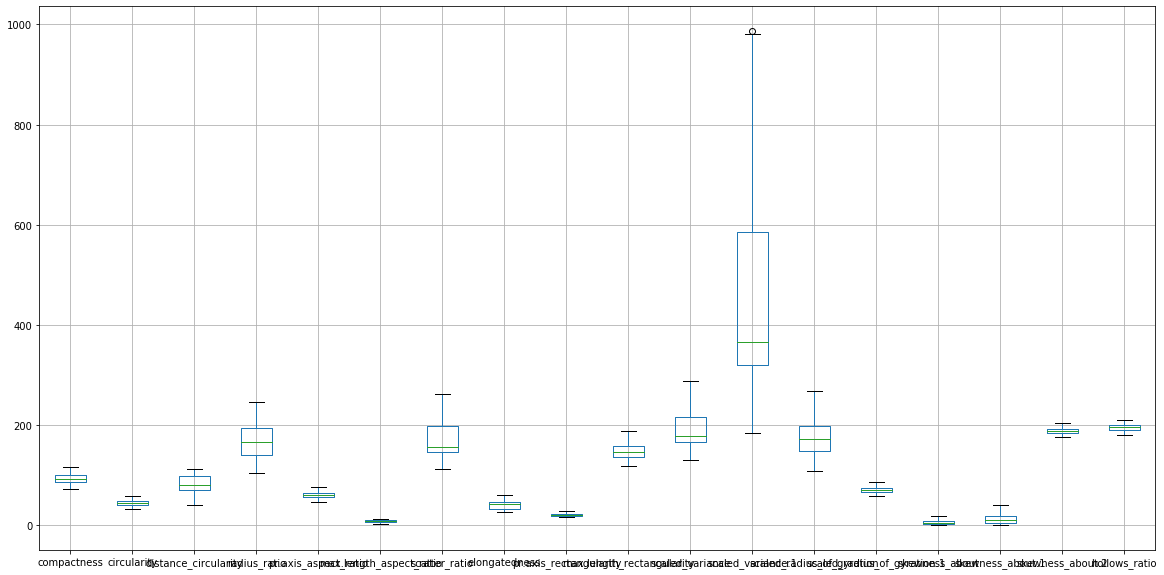

In [24]:
Vehicle_Data_Clean.boxplot(figsize=(20,10))

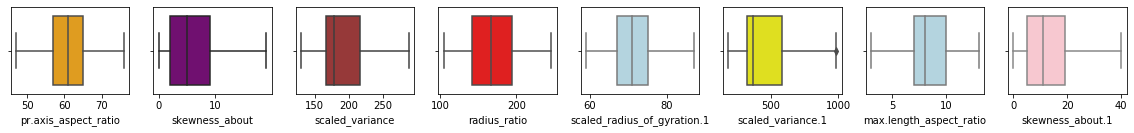

In [25]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= Vehicle_Data_Clean['pr.axis_aspect_ratio'], color='orange')

plt.subplot(8,8,2)
sns.boxplot(x= Vehicle_Data_Clean.skewness_about, color='purple')

plt.subplot(8,8,3)
sns.boxplot(x= Vehicle_Data_Clean.scaled_variance, color='brown')
plt.subplot(8,8,4)
sns.boxplot(x= Vehicle_Data_Clean['radius_ratio'], color='red')

plt.subplot(8,8,5)
sns.boxplot(x= Vehicle_Data_Clean['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(8,8,6)
sns.boxplot(x= Vehicle_Data_Clean['scaled_variance.1'], color='yellow')

plt.subplot(8,8,7)
sns.boxplot(x= Vehicle_Data_Clean['max.length_aspect_ratio'], color='lightblue')

plt.subplot(8,8,8)
sns.boxplot(x= Vehicle_Data_Clean['skewness_about.1'], color='pink')

plt.show()

We can see that all out boxplot for all the attributes which had outlier have been treated and removed.

### Bivariate Analysis:
We will use a Correlation Coefficient heatmap to see what attributes are linearly related and also visualize the same in the seaborns scatter plot.

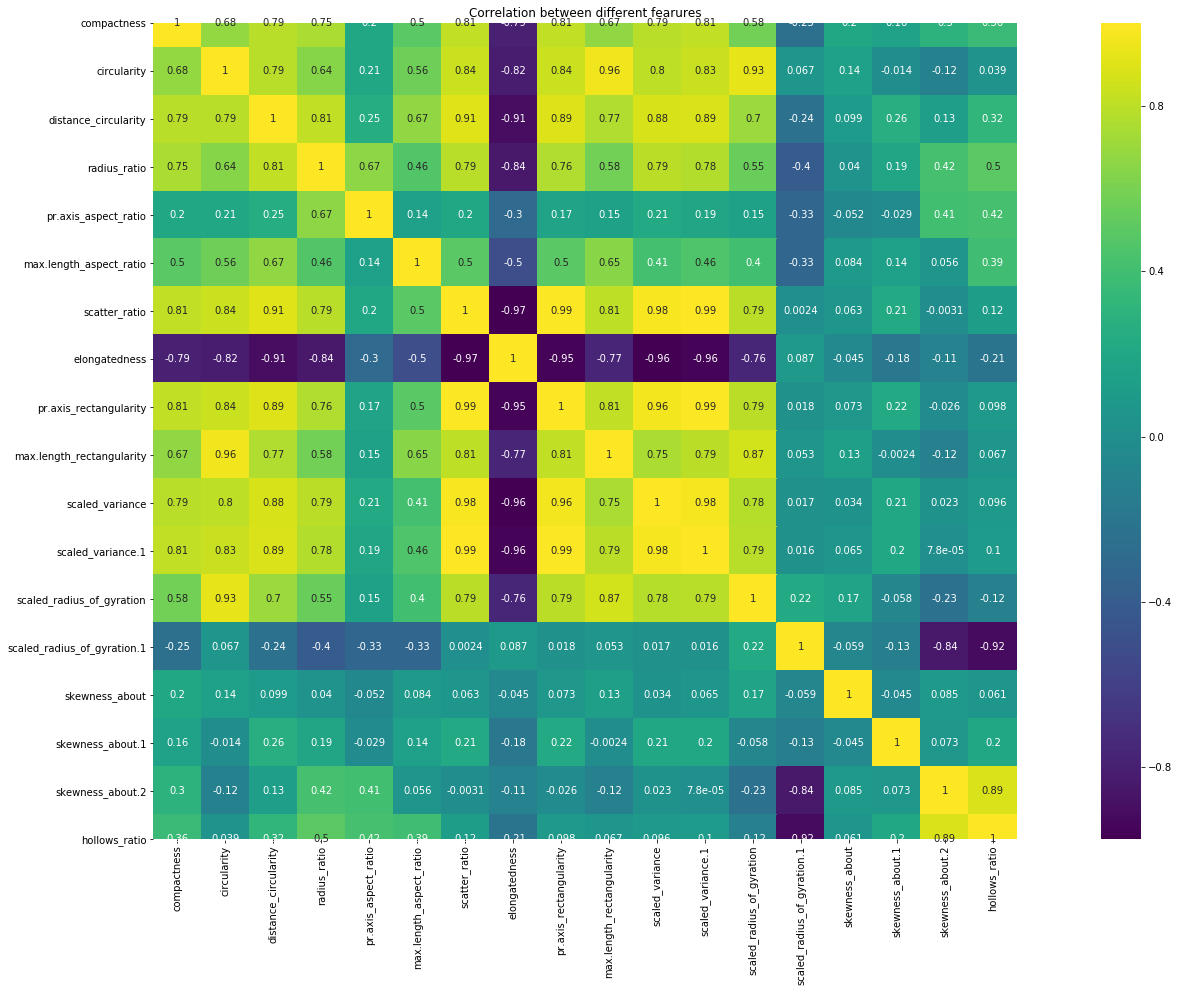

In [26]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();

correlation_heatmap(Vehicle_Data_Clean, 30,15)

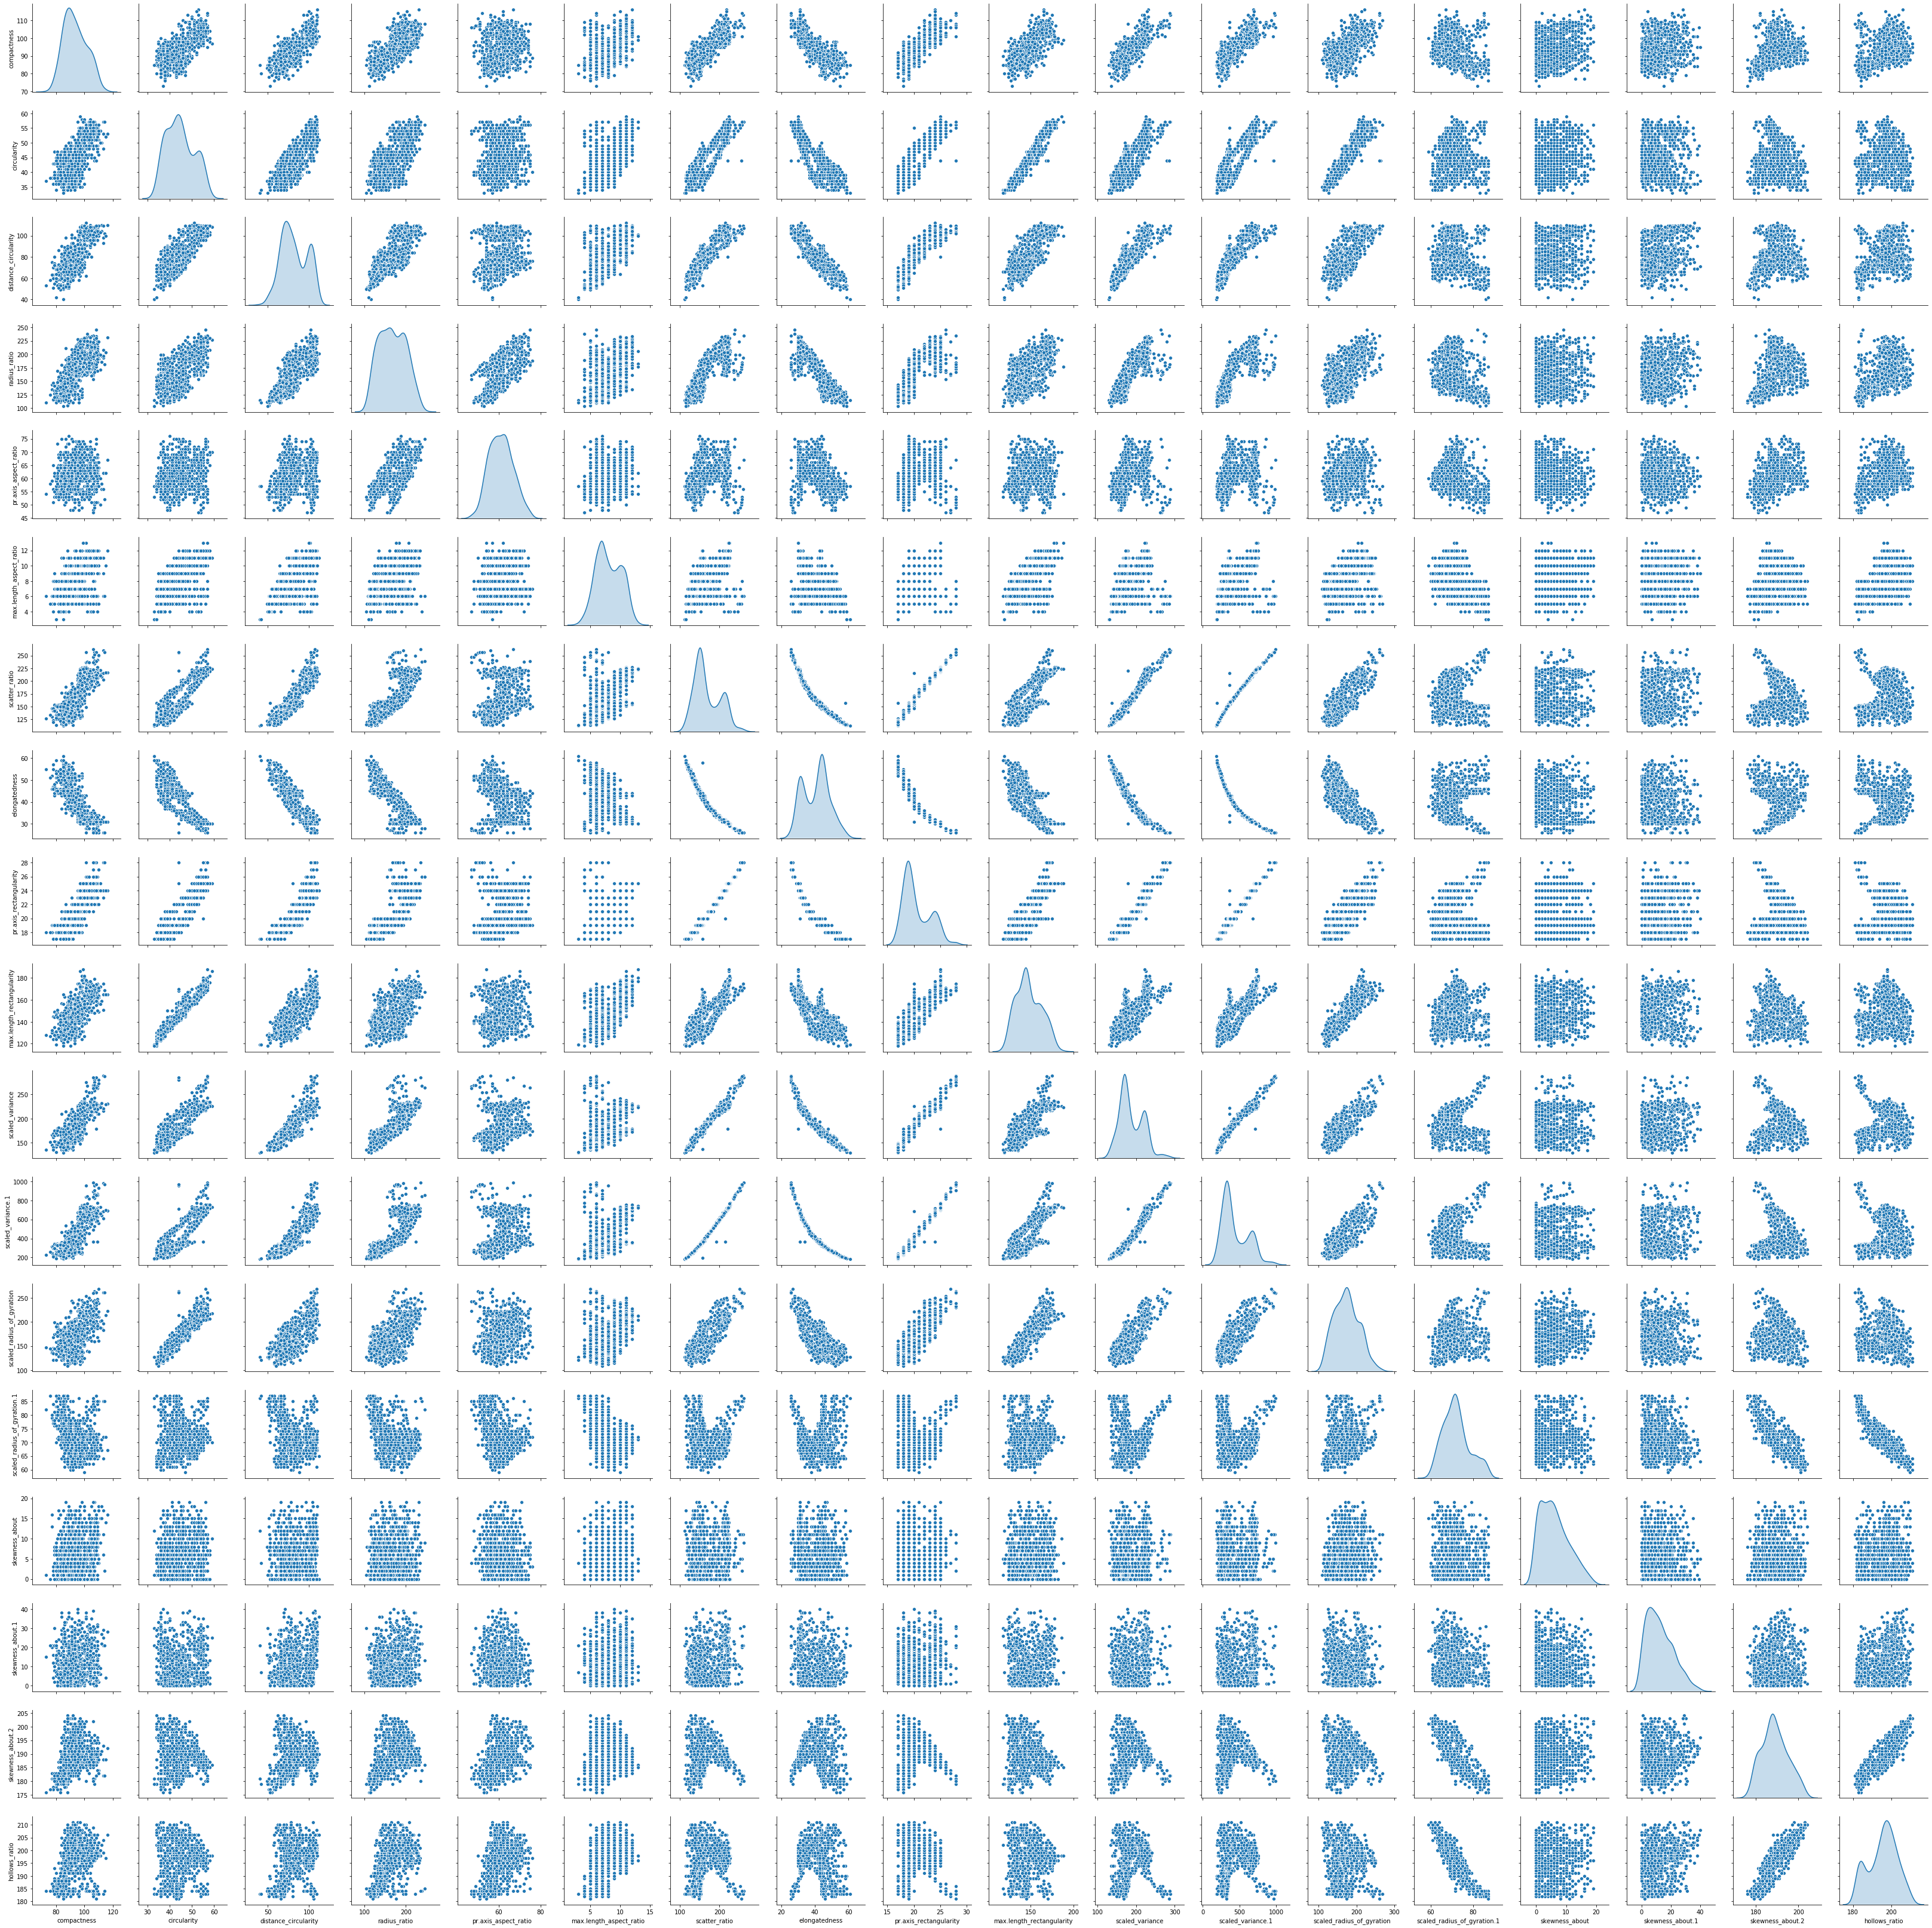

In [27]:
sns.pairplot(Vehicle_Data_Clean, diag_kind="kde")

**Summary of outcome from Bivariate analysis:**

As observed in our correlation heatmap our pairplot seems to validate the same. Scaled Variance & Scaled Variance.1 seems to be have very strong positive correlation with value of 0.98. skewness_about_2 and hollow_ratio also seems to have strong positive correation with coeff: 0.89

scatter_ratio and elongatedness seems to be have very strong negative correlation.

### Selecting the appropriate data attributes have to be a part of the analysis:

If two features are highly correlated then there is no point using both features. In the case of highly correlated features, it is appropriate to drop one of the correlated feature. The SNS heatmap gives us the correlation matrix where we can see which features are highly correlated.

From above correlation matrix we can see that there are many features which are highly correlated. if we carefully analyse, we will find that many features are there which having more than 0.9 correlation. so we can decide to get rid of those columns whose correlation is +-0.9 or above.There are 8 such columns:

- max.length_rectangularity
- scaled_radius_of_gyration
- skewness_about.2
- scatter_ratio
- elongatedness
- pr.axis_rectangularity
- scaled_variance
- scaled_variance.

We observed that more than 50 % of our attributes are highly correlated.  

### PRINCIPAL COMPONENT ANALYSIS (PCA)

**Separate The Data Into Independent & Dependent attribute**

In [28]:
X = Vehicle_Data.drop(['class'], axis =1)
y = Vehicle_Data[['class']]

**Scaling The Independent Data Set:**

In [29]:
from sklearn.preprocessing import StandardScaler
#We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_Scaled =  sc.fit_transform(X) 

**Calculating covariance matrix:**

In [30]:
covMatrix = np.cov(X_Scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

**Calculating Eigen Vectors & Eigen Values:**

In [31]:
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

**Sort eigenvalues in descending order:**

In [32]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088705, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524633, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389657, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450215, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.0

In [33]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

**Plotting The Explained Variance and Princiapl Components:**

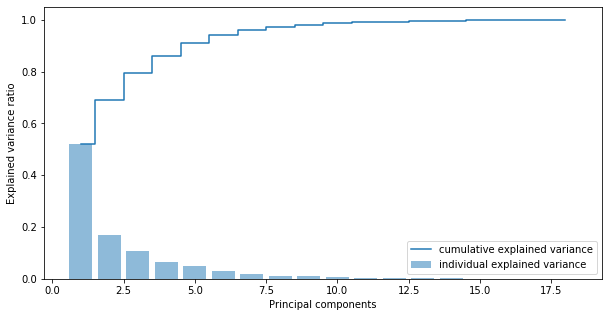

In [34]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

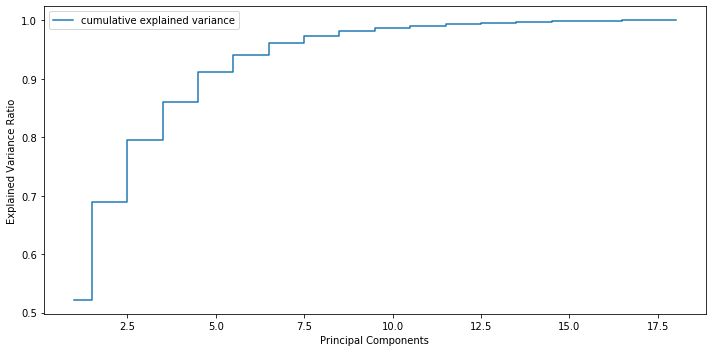

In [35]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

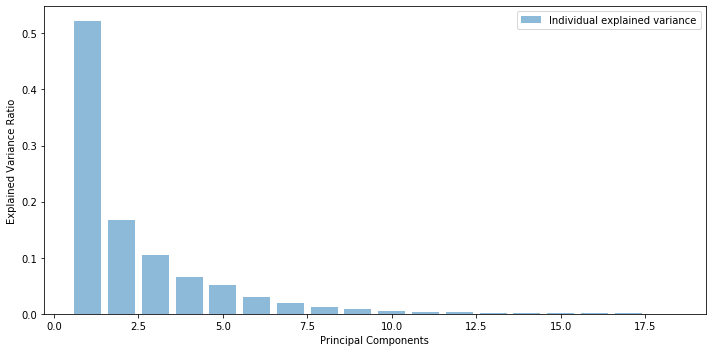

In [36]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, 19), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Quick Observation:
- From above we plot we can clealry observer that 8 dimension() are able to explain 95 %variance of data. 
- so we will use first 8 principal components going forward and calulate the reduced dimensions.

# DIMENSIONALITY REDUCTION 

With 8 variables we can explain over 95% of the variation in the original data!

In [37]:
P_reduce = np.array(eigvectors_sorted[0:8])  

X_std_8D = np.dot(X_Scaled,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026  -1.001584 -0.176612 -0.079301 -0.757447 -0.901124   
1   -1.591711  0.420603   0.369034 -0.233234 -0.693949 -0.517162  0.378637   
2    3.769324 -0.195283  -0.087859 -1.202212 -0.731732  0.705041 -0.034584   
3   -1.738598  2.829692  -0.109456 -0.376685  0.362897 -0.484431  0.470753   
4    0.558103 -4.758422 -11.703647 -0.147464 -3.256953 -0.203446  2.671578   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.442648  0.605884  -0.197213  1.444958 -1.065425  0.820179 -0.041563   
842 -0.314956 -0.164511  -0.794573  0.908272  0.235492 -1.438257 -0.599113   
843  4.809174  0.001249  -0.532333 -0.295652  1.344236 -0.217070  0.573249   
844 -3.294092  1.008276   0.357003  1.933675 -0.042768 -0.402491 -0.202406   
845 -4.765053 -0.334900   0.568136  1.224807  0.054051 -0.335637  0.058098   

            7  
0    0.381106  
1   -0.247059  
2   -0.482772  
3    0.023086  
4    0.448854  
..        ...  
841 -0.506991  
842  0.153086  
843 -0.110478  
844 -0.320622  
845  0.248035  

[846 rows x 8 columns]

**Let us check The Pairplot Of Reduced Dimension After PCA:**

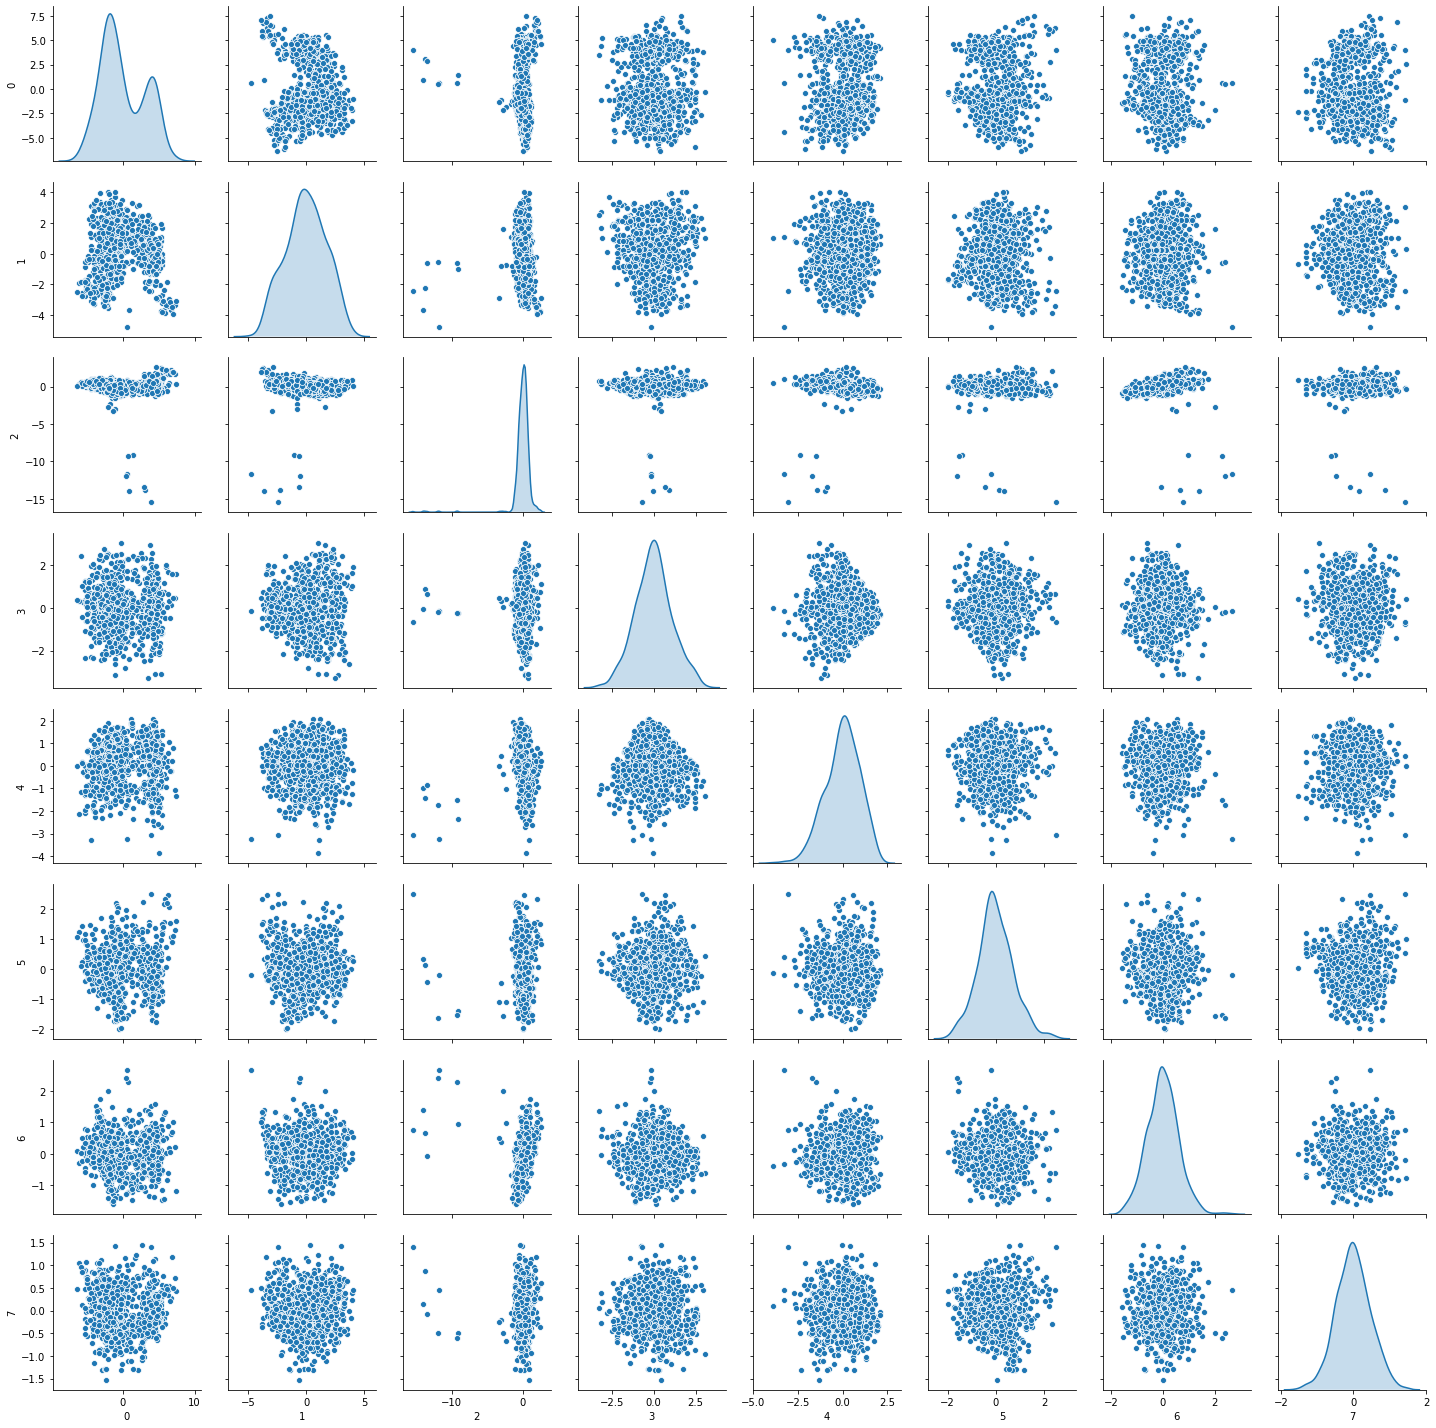

In [38]:
sns.pairplot(reduced_pca, diag_kind='kde') 

After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no lienaer kind of relationship.

## FITTING MODEL AND MEASURING SCORE SIMPLY ON ORIGINAL DATA

Lets construct two Support Vector Classifier Model one with 18 original independent variables and the second one with only the 8 new reduced variables constructed using PCA.

**Now split the data into 70:30 ratio**

In [39]:
#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_Scaled,y,test_size=0.30,random_state=1)

In [40]:
#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)

Let's train the model with both original data and pca data with new dimension

**Fitting SVC model On Original Data:**

In [41]:
svc = SVC()
svc.fit(Orig_X_train,Orig_y_train)#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)

#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)

**Fitting SVC ON PCA Data:**

In [42]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

In [43]:
#display accuracy score of both models

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.952755905511811
Model Score On Reduced PCA Dimension  0.9330708661417323
Before PCA On Original 18 Dimension 0.952755905511811
After PCA(On 8 dimension) 0.9330708661417323


### CONCLUDING OBSERVATIONS:

On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 95 %
But when we applied the SVC model on PCA componenets(reduced dimensions) our model scored 93 %.
Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score.

## HYPERTUNING SVM USING HYPER PARAMETERS:

### Let's Apply Grid Search & Cross-Validation:To Tune Our Model and Validate The Model's Accuracy Score

In [44]:
import itertools

def classifiers_hypertune(name,rf,param_grid,x_train_scaled,y_train,x_test_scaled,y_test,CV):
    CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=CV, verbose= 1, n_jobs =-1 )
    CV_rf.fit(x_train_scaled, y_train)
    
    y_pred_train = CV_rf.predict(x_train_scaled)
    y_pred_test = CV_rf.predict(x_test_scaled)
    
    print('Best Score: ', CV_rf.best_score_)
    print('Best Params: ', CV_rf.best_params_)
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
    
    print("SVM Accuracy Score:",round(accuracy_score(y_test, y_pred_test),2)*100)
    

In [45]:
#Training on SVM Classifier
from sklearn.model_selection import GridSearchCV
svmc = SVC()

#Let's See What all parameters one can tweak 
print("SVM Parameters:", svmc.get_params())

# Create the parameter grid based on the results of random search 
param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

param_grid_1 = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

print("SVM Accuracy Score:", round(accuracy_score(pca_y_test, pca_y_test),2)*100)

SVM Parameters: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVM Accuracy Score: 100.0


### Hypertuning SVM using hyper Parameters:

In [46]:
classifiers_hypertune("Support Vector Classifier", svmc, param_grid,pca_X_train, pca_y_train, pca_X_test, pca_y_test,10)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.9358108108108109
Best Params:  {'C': 1, 'kernel': 'rbf'}
Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

         bus       0.95      0.97      0.96        59
         car       0.93      0.95      0.94       133
         van       0.92      0.87      0.89        62

    accuracy                           0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254

SVM Accuracy Score: 93.0


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.0s finished


Hyper tuning of Model on PCA Data Set:
- We generally tune some of the important hyperparameters of the model which are not the model parameter. like here we played with C value : penalty and the type of kernel : rbf/liner
- GridSearchCV get's the best paramter from the array of parameters and find the best model and score for us.
- Here on perfroming gridsearch hyper tuning of SVM model we got the best parameter to be : Best Score: 0.9256756756756757 : Best Params: {'C': 1, 'kernel': 'rbf'} : Accruacy Score : 95 % which seems to be similar to than what we measured earlier in our appraoch 2
- We can further play with hyper parameters and see if it helps to score our model better

### Let's further tweak the parameters to see if we can improve our model accuracy :

In [47]:
classifiers_hypertune("Support Vector Classifier_iterarion2", svmc, param_grid_1,pca_X_train, pca_y_train, pca_X_test, pca_y_test,10)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.9341216216216216
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Support Vector Classifier_iterarion2 Classification Report: 
              precision    recall  f1-score   support

         bus       0.90      0.95      0.93        59
         car       0.98      0.95      0.97       133
         van       0.94      0.94      0.94        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

SVM Accuracy Score: 95.0


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   27.6s finished


We can see a slight improvement in best model which was picked by our gridsearchcv method: 93.4 % and also we saw a slight increase in model accuracy score : 95 %

## CONCLUDING REMARKS - SUMMARY OF RESULTS FROM CORGIE VEHICLE DATA PCA

Principal Component Analysis (PCA) assists us to select only the relevant features by analysing the relationship between independent attributes to see which one will be more helpful in building our model without introducing any impurity in it. 

The implementation of PCA can increase the models performance both in terms of processing speed and the ease of model implementation. 

It is also advisable to perform hyperparameter tuning techniques to improve and determined the models optimal performance and also employs Cross-fold validation internally to make sure our model is ready to face production environment. 
